# Global minimization: Skewed Mexican hat

In this example we will demonstrate the ease of performing global minimization using ``symfit``. In order to do this we will have a look at a simple skewed mexican hat potential, which has a local minimum and a global minimum. We will then use ``DifferentialEvolution`` to find the global minimum. 

In [1]:
from symfit import Parameter, Variable, Model, Fit, solve, diff, N, re
from symfit.core.minimizers import DifferentialEvolution, BFGS
import numpy as np
import matplotlib.pyplot as plt


First we define a model for the skewed mexican hat.


In [2]:
x = Parameter('x')
x.min, x.max = -100, 100
y = Variable('y')
model = Model({y: x**4 - 10 * x**2 + 5 * x})  # Skewed Mexican hat
print(model)


[y(; x) = x**4 - 10*x**2 + 5*x]


Let us visualize what this potential looks like.


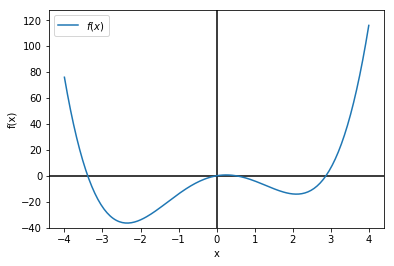

In [16]:
xdata = np.linspace(-4, 4, 201)
ydata = model(x=xdata).y

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(xdata, ydata, label=r'$f(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(1.1 * ydata.min(), 1.1 * ydata.max())
plt.legend()


Using ``sympy``, it is easy to solve the solution analytically, by finding the places where the gradient is zero. 


In [17]:
sol = solve(diff(model[y], x), x)
# Give numerical value
sol = [re(N(s)) for s in sol]
sol

[0.253248404857807, 2.09866205647752, -2.35191046133532]

Without providing any initial guesses, ``symfit`` finds the local minimum. This is because the initial guess is set to ``1`` by default.

In [18]:
fit = Fit(model)
fit_result = fit.execute()
print('exact value', sol[1])
print('num  value ', fit_result.value(x))
  

exact value 2.09866205647752
num  value  2.09866205722533


Let's use ``DifferentialEvolution`` instead.


In [19]:
fit = Fit(model, minimizer=DifferentialEvolution)
fit_result = fit.execute()
print('exact value', sol[2])
print('num  value ', fit_result.value(x))


exact value -2.35191046133532
num  value  -2.3500650028722148


Using ``DifferentialEvolution``, we find the correct global minimum. However, it is not exactly the same as the analytical solution. This is because ``DifferentialEvolution`` is expensive to perform, and therefore does not solve to high precision by default. We could demand a higher precission from ``DifferentialEvolution``, but this isn't worth the high computational cost. Instead, we will just tell ``symfit`` to perform ``DifferentialEvolution``, followed by ``BFGS``.


In [20]:
fit = Fit(model, minimizer=[DifferentialEvolution, BFGS])
fit_result = fit.execute()
print('exact value', sol[2])
print('num  value ', fit_result.value(x))

exact value -2.35191046133532
num  value  -2.351910461335324


We see that now the proper solution has been found to much higher precision.
